## Mounting your google drive

You can use google drive to store and access files e.g. storing and loading data from numpy or CSV files.  
Use the following command to mount your GDrive and access your files.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pip install ffmpeg
!pip install vtk

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=5d346ed7331bfd90a133d5b7118e09569e2dedf96bcc8602db386b1a93d2c398
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg
     |████████████████████████████████| 59.5 MB 36 kB/s 
     |████████████████████████████████| 3.1 MB 64.1 MB/s 
     |████████████████████████████████| 495 kB 65.5 MB/s 
     |████████████████████████████████| 3.2 MB 60.2 MB/s 
     |████████████████████████████████| 74 kB 4.3 MB/s 
     |████████████████████████████████| 251 kB 76.0 MB/s 
     |████████████████████████████████| 1.3 MB 73.5 MB/s 
     |████████████████████████████████| 294 kB 74.0 MB/s 
     |████████████████████████████████| 142 kB 76.9 MB/s 


In [3]:
import os
# change the current path. The user can adjust the path depend on the requirement
os.chdir("/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF")
import vtktools

In [4]:
! /opt/bin/nvidia-smi

Sun Aug 22 09:58:38 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# !unzip csv_data.zip 

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import numpy.linalg as la
import scipy.linalg as sl
import scipy.sparse.linalg as spl
import matplotlib.pyplot as plt
import torch.nn as nn  # Neural network module
import scipy.sparse as sp
import scipy.optimize as sop
import progressbar
# making slopes
import torch
from torch.utils.data import TensorDataset
import torch.nn.functional as F
from matplotlib.pyplot import LinearLocator
import matplotlib as mpl
import matplotlib.colors as colors


# create an animation
from matplotlib import animation
from IPython.display import HTML

from matplotlib import animation
import math
import ffmpeg

!pip install pycm livelossplot
%pylab inline
from livelossplot import PlotLosses

from torch.utils.data import DataLoader
import torch.utils.data as Data

import time
import platform
print('python version', platform.python_version())
print('torch version', torch.__version__)
print('numpy version', np.version.version)

     |████████████████████████████████| 64 kB 2.6 MB/s 
     |████████████████████████████████| 571 kB 18.1 MB/s 
Populating the interactive namespace from numpy and matplotlib
python version 3.7.11
torch version 1.9.0+cu102
numpy version 1.19.5


In [7]:
def set_seed(seed):
    """
    Use this to set ALL the random seeds to a fixed value and take out any randomness from cuda kernels
    """
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.benchmark = True  ##uses the inbuilt cudnn auto-tuner to find the fastest convolution algorithms. -
    torch.backends.cudnn.enabled   = True

    return True

device = 'cuda'  # Set out device to GPU

print('Cuda installed, running on GPU!')  # print sentence

Cuda installed, running on GPU!


# SFC-CAE

In [8]:
# These functions are saved in function.py and the note are also added to that file
def saveIndex(path_train, path_valid, path_test,train_index, valid_index, test_index):
    # save training and validation loss    
    np.savetxt(path_train,train_index, delimiter=',')
    np.savetxt(path_valid,valid_index, delimiter=',')
    np.savetxt(path_test,test_index, delimiter=',')

def getIndex(path_train,path_valid,path_test):
    train_index = np.loadtxt(path_train,delimiter=",")
    valid_index = np.loadtxt(path_valid,delimiter=",")
    test_index = np.loadtxt(path_test,delimiter=",")
    return train_index,valid_index,test_index

def saveMode(path_train, path_valid, path_test,mode_train, mode_valid, mode_test):
    # save training and validation loss    
    np.savetxt(path_train,mode_train.cpu().data.numpy(), delimiter=',')
    np.savetxt(path_valid,mode_valid.cpu().data.numpy(), delimiter=',')
    np.savetxt(path_test,mode_test.cpu().data.numpy(), delimiter=',')

def getMode(path_train,path_valid,path_test):
    mode_train = np.loadtxt(path_train,delimiter=",")
    mode_valid = np.loadtxt(path_valid,delimiter=",")
    mode_test = np.loadtxt(path_test,delimiter=",")
    return mode_train,mode_valid,mode_test

def saveCsv(pathcsv,EPOCH):
    # save training and validation loss
    losses_combined = np.zeros((EPOCH,3))
    losses_combined[:,0] = np.asarray(epoch_list)
    losses_combined[:,1] = np.asarray(loss_list)
    losses_combined[:,2] = np.asarray(loss_valid)
    np.savetxt(pathcsv, losses_combined , delimiter=',')

def PlotMSELoss(pathName,name):
    epoch = pd.read_csv(pathName,usecols=[0]).values
    train_loss = pd.read_csv(pathName,usecols=[1]).values
    val_loss = pd.read_csv(pathName,usecols=[2]).values

    fig = plt.figure(figsize=(10,7))
    axe1 = plt.subplot(111)
    axe1.semilogy(epoch,train_loss,label = "train")
    axe1.plot(epoch,val_loss,label = "valid")
    axe1.legend(loc = "best",fontsize=14)
    axe1.set_xlabel("$epoch$",fontsize=14)
    axe1.set_ylabel("$MSE loss$",fontsize=14)
    axe1.set_title(name,fontsize=14)

def getTotal_decoded(training_decoded,valid_decoded,test_decoded,train_index,valid_index,test_index):
    total_decoded = np.zeros((nTotal,nNodes,2))
    for i in range(len(train_index)):
        total_decoded[int(train_index[i]),:,0] = training_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(train_index[i]),:,1] = training_decoded.cpu().detach().numpy()[i,:,1]

    for i in range(len(valid_index)):
        total_decoded[int(valid_index[i]),:,0] = valid_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(valid_index[i]),:,1] = valid_decoded.cpu().detach().numpy()[i,:,1]

    for i in range(len(test_index)):
        total_decoded[int(test_index[i]),:,0] = test_decoded.cpu().detach().numpy()[i,:,0]
        total_decoded[int(test_index[i]),:,1] = test_decoded.cpu().detach().numpy()[i,:,1]
    return total_decoded

def getMSELoss(pathName):
    epoch = pd.read_csv(pathName,usecols=[0]).values
    train_loss = pd.read_csv(pathName,usecols=[1]).values
    val_loss = pd.read_csv(pathName,usecols=[2]).values
    return train_loss,val_loss,epoch

def index_split(train_ratio, valid_ratio, test_ratio, total_num):
    if train_ratio + valid_ratio + test_ratio != 1:
        raise ValueError("Three input ratio should sum to be 1!")
    total_index = np.arange(total_num)
    rng = np.random.default_rng()
    total_index = rng.permutation(total_index)
    knot_1 = int(total_num * train_ratio)
    knot_2 = int(total_num * valid_ratio) + knot_1
    train_index, valid_index, test_index = np.split(total_index, [knot_1, knot_2])
    return train_index, valid_index, test_index

In [9]:
path_train = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_train_index.csv"
path_valid = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_valid_index.csv"
path_test = "/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF/"+"new_FPC_test_index.csv"
# saveIndex(path_train, path_valid, path_test,train_index, valid_index, test_index)

In [10]:
# Load the train_index, valid_index and test_index
train_index,valid_index,test_index= getIndex(path_train,path_valid,path_test)
print(test_index)

[ 133.  490. 1480.  730.  481. 1382.  440.  750. 1502. 1451.  692. 1094.
 1679.  510. 1241. 1101.  543. 1312. 1432. 1988. 1148. 1801. 1519.  367.
 1858. 1043. 1175. 1218. 1479.  103. 1363.  800.  258. 1851.  267.  999.
  611. 1824.  318.  753. 1413.  727. 1273. 1358. 1090.  838.  250. 1763.
 1038.  439. 1199.  334. 1848. 1924. 1013.  271.  936.  600. 1553.  423.
 1467. 1658.  929. 1748.  783.  329.  303. 1067.  868.  374. 1102. 1843.
  683.  449.  855. 1142. 1393.  194. 1112.  636. 1617. 1910. 1722.  536.
 1149. 1765.  468. 1922. 1703. 1311.  341.  110. 1258. 1257. 1711.   93.
 1969.  396. 1259.  199.  962. 1704.  462. 1407.  634.  535. 1505.  537.
  612. 1707. 1565. 1963. 1955.    3. 1058. 1946.  372. 1653. 1077.  414.
  469.  680. 1430.  649.  215.  234. 1692.  653. 1455.  582. 1169. 1138.
  411.  518.  865. 1977. 1688.  822.  397. 1388. 1221.  239.  249. 1781.
 1751.  915.  278. 1970.  907.  477. 1552.  703.  870.  916. 1650.  561.
 1401.  129. 1123. 1804. 1871. 1527.  308.   94. 19

## load data

In [11]:
os.chdir('/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF')
print(os.getcwd())

# read in the data (1000 csv files)
nTrain = 1600
nValid = 200
nTest = 200
nTotal = nTrain + nValid + nTest
nNodes = 20550 # should really work this out


# The below method to load data is too slow. Therefore, we use load pt file

# [:, :, 2] is speed, [:, :, 3] is u, [:, :, 4] is v
# (speed not really needed)
# [:, :, 0] and [:, :, 1] are the SFC orderings

# training_data = np.zeros((nTrain,nNodes,5))
# for i in range(nTrain):
#     data = np.loadtxt('csv_data/data_' +str(int(train_index[i]))+ '.csv', delimiter=',')
#     training_data[i,:,:] = data
# training_data = np.array(training_data)
# print('size training data', training_data.shape)

# valid_data = np.zeros((nValid,nNodes,5))
# for i in range(nValid):
#     data = np.loadtxt('csv_data/data_' +str(int(valid_index[i]))+ '.csv', delimiter=',')
#     valid_data[i,:,:] = data
# valid_data = np.array(valid_data)
# print('size validation data', valid_data.shape)

# test_data = np.zeros((nTest,nNodes,5))
# for i in range(nTest):
#     data = np.loadtxt('csv_data/data_' +str(int(test_index[i]))+ '.csv', delimiter=',')
#     test_data[i,:,:] = data
# test_data = np.array(test_data)
# print('size test data', test_data.shape)

# total_data = np.zeros((nTotal,nNodes,5))
# for i in range(len(train_index)):
#     total_data[int(train_index[i]),:,:] = training_data[i,:,:]

# for i in range(len(valid_index)):
#     total_data[int(valid_index[i]),:,:] = valid_data[i,:,:]

# for i in range(len(test_index)):
#     total_data[int(test_index[i]),:,:] = test_data[i,:,:]
# print('size total data', total_data.shape)



/content/gdrive/MyDrive/Cola-Notebooks/FYP/YF


In [12]:
# Before we save the pt file, we must load the data according to the above method
# torch.save(training_data, '/content/gdrive/MyDrive/FPC_new_random_train.pt')
# torch.save(valid_data, '/content/gdrive/MyDrive/FPC_new_random_valid.pt')
# torch.save(test_data, '/content/gdrive/MyDrive/FPC_new_random_test.pt')
# torch.save(total_data, '/content/gdrive/MyDrive/FPC_new_random_total.pt')


In [13]:
# load the data, this method save the time
training_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_train.pt')
valid_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_valid.pt')
test_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_test.pt')
total_data = torch.load('/content/gdrive/MyDrive/FPC_new_random_total.pt')
print(training_data.shape)
print(valid_data.shape)
print(test_data.shape)
print(total_data.shape)

(1600, 20550, 5)
(200, 20550, 5)
(200, 20550, 5)
(2000, 20550, 5)


In [14]:
# rescale the data so that u and v data lies in the range [-1,1] (and speed in [0,1])
ma = np.max(training_data[:, :, 2])
mi = np.min(training_data[:, :, 2])
k = 1./(ma - mi)
b = 1 - k*ma #k*mi
training_data[:, :, 2] = k * training_data[:, :, 2] + b #- b
# this won't be used

ma = np.max(training_data[:, :, 3])
mi = np.min(training_data[:, :, 3])
ku = 2./(ma - mi)
bu = 1 - ku*ma 
training_data[:, :, 3] = ku * training_data[:, :, 3] + bu
valid_data[:, :, 3] = ku * valid_data[:, :, 3] + bu
test_data[:, :, 3] = ku * test_data[:, :, 3] + bu
total_data[:, :, 3] = ku * total_data[:, :, 3] + bu

ma = np.max(training_data[:, :, 4])
mi = np.min(training_data[:, :, 4])
kv = 2./(ma - mi)
bv = 1 - kv*ma
training_data[:, :, 4] = kv * training_data[:, :, 4] + bv
valid_data[:, :, 4] = kv * valid_data[:, :, 4] + bv
test_data[:, :, 4] = kv * test_data[:, :, 4] + bv
total_data[:, :, 4] = kv * total_data[:, :, 4] + bv

## Network architetcure

In [15]:
# SFC-CAE: two curves with nearest neighbour smoothing and compressing to 128 latent variables
print("compress to 128")
Latent_num = 128
torch.manual_seed(42)
# Hyper-parameters
EPOCH = 2001
BATCH_SIZE = 16
LR = 0.0001
k = nNodes # number of nodes - this has to match training_data.shape[0]
print(training_data.shape) # nTrain by number of nodes by 5

# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = training_data, batch_size = BATCH_SIZE, shuffle = True)

compress to 128
(1600, 20550, 5)


In [16]:
class CNN_1(nn.Module):
    def __init__(self):
        super(CNN_1, self).__init__()
        self.encoder_h1 = nn.Sequential(         
            nn.Tanh(),
            nn.Conv1d(4, 4, 16, 4, 9),         # output shape  (16, 4, 5139)
            nn.Tanh(),                  # activation
            nn.Conv1d(4, 4, 16, 4, 9),         # output shape  (16, 4, 1286)
            nn.Tanh(),                   # activation
            nn.Conv1d(4, 8, 16, 4, 9),         # output shape  (16, 8, 323)
            nn.Tanh(),                    # activation
            nn.Conv1d(8, 8, 16, 4, 9),         # output shape  (16, 8, 82)
            nn.Tanh(),                    # activation
        )

        self.encoder_h2 = nn.Sequential(        
            nn.Tanh(),
            nn.Conv1d(4, 4, 16, 4, 9),        # output shape  (16, 4, 5139)
            nn.Tanh(),                  # activation
            nn.Conv1d(4, 4, 16, 4, 9),        # output shape  (16, 4, 1286)
            nn.Tanh(),                  
            nn.Conv1d(4, 8, 16, 4, 9),        # output shape  (16, 8, 323)
            nn.Tanh(),                   
            nn.Conv1d(8, 8, 16, 4, 9),        # output shape  (16, 8, 82)
            nn.Tanh(),                   
        )

        self.fc1 = nn.Sequential(           
            nn.Linear(16*82,  128), 
            nn.Tanh(),                    # activation      
        )
        
        self.fc2 = nn.Sequential(           
            nn.Linear(128, 16*82), 
            nn.Tanh(),                    # activation    
        )
        
        self.decoder_h1 = nn.Sequential(     
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 17, 4, 9), # (16, 8, 323)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 4, 16, 4, 9), # (16, 4, 1286)
            nn.Tanh(),
            nn.ConvTranspose1d(4, 4, 17, 4, 9), # (16, 4, 5139)
            nn.Tanh(),
            nn.ConvTranspose1d(4, 4, 16, 4, 9), # (16, 4, 20550) 
            nn.Tanh(),
        )

        self.decoder_h2 = nn.Sequential(     
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 17, 4, 9), # (16, 8, 323)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 4, 16, 4, 9), # (16, 4, 1286)
            nn.Tanh(),
            nn.ConvTranspose1d(4, 4, 17, 4, 9), # (16, 4, 5139)
            nn.Tanh(),
            nn.ConvTranspose1d(4, 4, 16, 4, 9), # (16, 4, 20550) 
            nn.Tanh(),
        )
        
        # input sparse layers, initialize weight as 0.33, bias as 0
        self.weight1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight11 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias11 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        
        self.weight2 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight22 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias22 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        # output sparse layers, initialize weight as 0.083, bias as 0
        self.weight_out1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out1_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out1_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out11 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out11_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out11_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out2 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out22 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out3 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out33 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out4 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out44 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.bias_out1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.bias_out2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)


    def forward(self, x):
        
        # first curve
        
        ToSFC1 = x[:, :, 0]
        ToSFC1Up = torch.zeros_like(ToSFC1)
        ToSFC1Down = torch.zeros_like(ToSFC1)
        ToSFC1Up[:-1] = ToSFC1[1:]
        ToSFC1Up[-1] = ToSFC1[-1]
        ToSFC1Down[1:]=ToSFC1[:-1]
        ToSFC1Down[0]=ToSFC1[0]
        
        batch_num = ToSFC1.shape[0]
        #print("ToSFC1",ToSFC1.shape) # (16, 20550)
        
        x1 = x[:, :, 3:5]
        
        #print("x1", x1.shape) #  # (16, 20550, 2)

        x1_1d = torch.zeros((batch_num, 4, k)).to(device)
        # first input sparse layer, then transform to SFC order1
        for j in range(batch_num):
            x1_1d[j, 0, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight1 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight1_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight1_1 + self.bias1
            
            x1_1d[j, 1, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight11 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight11_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight11_1 + self.bias11

            x1_1d[j, 2, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight2 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight2_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight2_1 + self.bias2
            
            x1_1d[j, 3, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight22 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight22_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight22_1 + self.bias22
            #print("x1_1d[j]", x1_1d[j].shape)

        #print("x1_1d", x1_1d.shape)


        # second curve
        ToSFC2 = x[:, :, 1]
        ToSFC2Up = torch.zeros_like(ToSFC2)
        ToSFC2Down = torch.zeros_like(ToSFC2)
        ToSFC2Up[:-1] = ToSFC2[1:]
        ToSFC2Up[-1] = ToSFC2[-1]
        ToSFC2Down[1:]=ToSFC2[:-1]
        ToSFC2Down[0]=ToSFC2[0]
        
        x2_1d = torch.zeros((batch_num, 4, k)).to(device)      
        for j in range(batch_num):
            x2_1d[j, 0, :] = x1[j, :, 0][ToSFC2[j].long()] * self.weight3 + \
                             x1[j, :, 0][ToSFC2Up[j].long()] * self.weight3_0 + \
                             x1[j, :, 0][ToSFC2Down[j].long()] * self.weight3_1 + self.bias3
            
            x2_1d[j, 1, :] = x1[j, :, 0][ToSFC2[j].long()] * self.weight33 + \
                             x1[j, :, 0][ToSFC2Up[j].long()] * self.weight33_0 + \
                             x1[j, :, 0][ToSFC2Down[j].long()] * self.weight33_1 + self.bias33
            
            x2_1d[j, 2, :] = x1[j, :, 1][ToSFC2[j].long()] * self.weight4 + \
                             x1[j, :, 1][ToSFC2Up[j].long()] * self.weight4_0 + \
                             x1[j, :, 1][ToSFC2Down[j].long()] * self.weight4_1 + self.bias4
            
            x2_1d[j, 3, :] = x1[j, :, 1][ToSFC2[j].long()] * self.weight44 + \
                             x1[j, :, 1][ToSFC2Up[j].long()] * self.weight44_0 + \
                             x1[j, :, 1][ToSFC2Down[j].long()] * self.weight44_1 + self.bias44
        
        #print("x2_1d", x2_1d.shape)      
        
        # first cnn encoder
        encoded_1 = self.encoder_h1(x1_1d.view(-1, 4, k)) #(b, 32, 81)
        #print("encoded_1", encoded_1.shape

        # second cnn encoder
        encoded_2 = self.encoder_h2(x2_1d.view(-1, 4, k)) #(b, 32, 81)
        #print("encoded_2", encoded_2.shape)
        

        # flatten and concatenate
        encoded_3 = torch.cat((encoded_1.view(-1,16*41), encoded_2.view(-1,16*41)), 1)
        
        #print("encoded_3", encoded_3.shape)
        
        # fully connection
        encoded = self.fc1(encoded_3) # (b,64)

        decoded_1, decoded_2 = torch.split(self.fc2(encoded), 16*41, dim=1)  
        # print("decoded_1",decoded_1.shape)
        # print("decoded_2",decoded_2.shape)
        decoded_3 = self.decoder_h1(decoded_1.view(-1, 8, 82))
        #print("decoded_3", decoded_3.shape) # (16, 2, 20550)
        decoded_4 = self.decoder_h2(decoded_2.view(-1, 8, 82))
        #print("decoded_4", decoded_4.shape) # (16, 2, 20550)


        BackSFC1 = torch.argsort(ToSFC1)
        BackSFC1Up = torch.argsort(ToSFC1Up)
        BackSFC1Down = torch.argsort(ToSFC1Down)
        BackSFC2 = torch.argsort(ToSFC2)
        BackSFC2Up = torch.argsort(ToSFC2Up)
        BackSFC2Down = torch.argsort(ToSFC2Down)
        
        decoded_sp = torch.zeros((batch_num, k, 2)).to(device)
        # output sparse layer, resort according to SFC transform
        for j in range(batch_num):
            decoded_sp[j, :, 0] = decoded_3[j, 0, :][BackSFC1[j].long()] * self.weight_out1 + \
                                  decoded_3[j, 0, :][BackSFC1Up[j].long()] * self.weight_out1_0 + \
                                  decoded_3[j, 0, :][BackSFC1Down[j].long()] * self.weight_out1_1 + \
                                  decoded_3[j, 1, :][BackSFC1[j].long()] * self.weight_out11 + \
                                  decoded_3[j, 1, :][BackSFC1Up[j].long()] * self.weight_out11_0 + \
                                  decoded_3[j, 1, :][BackSFC1Down[j].long()] * self.weight_out11_1 + \
                                  decoded_4[j, 0, :][BackSFC2[j].long()] * self.weight_out2 + \
                                  decoded_4[j, 0, :][BackSFC2Up[j].long()] * self.weight_out2_0 + \
                                  decoded_4[j, 0, :][BackSFC2Down[j].long()] * self.weight_out2_1 + \
                                  decoded_4[j, 1, :][BackSFC2[j].long()] * self.weight_out22 + \
                                  decoded_4[j, 1, :][BackSFC2Up[j].long()] * self.weight_out22_0 + \
                                  decoded_4[j, 1, :][BackSFC2Down[j].long()] * self.weight_out22_1 + self.bias_out1 
            
            decoded_sp[j, :, 1] = decoded_3[j, 2, :][BackSFC1[j].long()] * self.weight_out3 + \
                                  decoded_3[j, 2, :][BackSFC1Up[j].long()] * self.weight_out3_0 + \
                                  decoded_3[j, 2, :][BackSFC1Down[j].long()] * self.weight_out3_1 + \
                                  decoded_3[j, 3, :][BackSFC1[j].long()] * self.weight_out33 + \
                                  decoded_3[j, 3, :][BackSFC1Up[j].long()] * self.weight_out33_0 + \
                                  decoded_3[j, 3, :][BackSFC1Down[j].long()] * self.weight_out33_1 + \
                                  decoded_4[j, 2, :][BackSFC2[j].long()] * self.weight_out4 + \
                                  decoded_4[j, 2, :][BackSFC2Up[j].long()] * self.weight_out4_0 + \
                                  decoded_4[j, 2, :][BackSFC2Down[j].long()] * self.weight_out4_1 + \
                                  decoded_4[j, 3, :][BackSFC2[j].long()] * self.weight_out44 + \
                                  decoded_4[j, 3, :][BackSFC2Up[j].long()] * self.weight_out44_0 + \
                                  decoded_4[j, 3, :][BackSFC2Down[j].long()] * self.weight_out44_1 + self.bias_out2 
        
        # resort 1D to 2D
        decoded = F.tanh(decoded_sp)
        #print("decoded", decoded.shape)
        return encoded, decoded

## Train

In [16]:
# The first network has been trained at 2SFC-CAE. Therefore, the mode we can load directly
# autoencoder = torch.load("./2SFC_CAE/pkl/II_Eran2000_LV128_B16_n1600_L0.0001.pkl")
# pass training, validation and test data through the autoencoder
# t_predict_0 = time.time()

# mode_1train, training_decoded = autoencoder.to(device)(torch.tensor(training_data).to(device))
# error_autoencoder = (training_decoded.cpu().detach().numpy() - training_data[:,:,3:5])
# print("MSE_err of training data", (error_autoencoder**2).mean())

# mode_1valid, valid_decoded = autoencoder.to(device)(torch.tensor(valid_data).to(device))
# error_autoencoder = (valid_decoded.cpu().detach().numpy() - valid_data[:, :, 3:5])
# print("Mse_err of validation data", (error_autoencoder**2).mean())

# mode_1test, test_decoded = autoencoder.to(device)(torch.tensor(test_data).to(device))
# error_autoencoder = (test_decoded.cpu().detach().numpy() - test_data[:, :, 3:5])
# print("Mse_err of test data", (error_autoencoder**2).mean())

# total_decoded = getTotal_decoded(training_decoded,valid_decoded,test_decoded,train_index,valid_index,test_index)
# error_autoencoder = (total_decoded - total_data[:, :, 3:5])
# print("Mse_err of total data", (error_autoencoder**2).mean())

# print(mode_1train.shape)
# print(mode_1valid.shape)
# print(mode_1test.shape)

## Save and  Plot loss

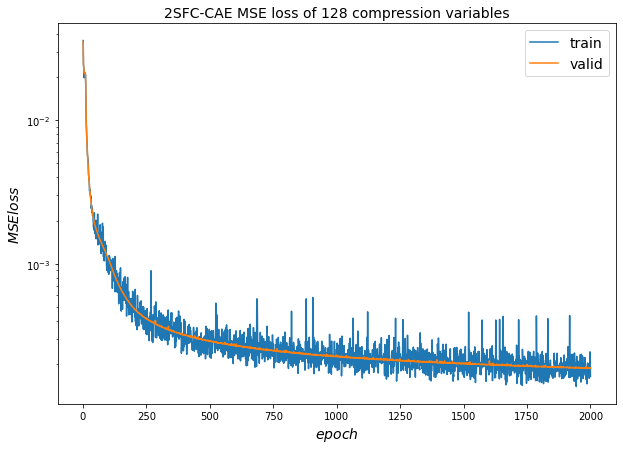

In [17]:
pathName = "./2SFC_CAE/csv/II_Eran2000_LV128_B16_n1600_L0.0001.csv"
name = "2SFC-CAE MSE loss of 128 compression variables"
PlotMSELoss(pathName,name)

In [ ]:
autoencoder = torch.load("./2SFC_CAE/pkl/II_Eran2000_LV128_B16_n1600_L0.0001.pkl")

## MSE

In [ ]:
# pass training, validation and test data through the autoencoder
t_predict_0 = time.time()

# mode_1train, training_decoded = autoencoder.to(device)(torch.tensor(training_data).to(device))
# error_autoencoder = (training_decoded.cpu().detach().numpy() - training_data[:,:,3:5])
# print("MSE_err of training data", (error_autoencoder**2).mean())

mode_1valid, valid_decoded = autoencoder.to(device)(torch.tensor(valid_data).to(device))
valid_error1 = (valid_decoded.cpu().detach().numpy() - valid_data[:, :, 3:5])
print("Mse_err of validation data", (valid_error1**2).mean())

mode_1test, test_decoded = autoencoder.to(device)(torch.tensor(test_data).to(device))
test_error1 = (test_decoded.cpu().detach().numpy() - test_data[:, :, 3:5])
print("Mse_err of test data", (test_error1**2).mean())

# print(mode_1train.shape)
print(mode_1valid.shape)
print(mode_1test.shape)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Mse_err of validation data 0.00018704685730866306
Mse_err of test data 0.00018257711846781968
torch.Size([200, 128])
torch.Size([200, 128])


## Save

Due to the memory limit of colab, the data must be saved respectively. Because the saved files are large, they can't be upload to Github repository. They are saved at a specified path, which is said in Readme.

### Save valid and test

In [ ]:
Latent_num = 128
torch.manual_seed(42)
BATCH_SIZE = 16
LR = 0.0001
nTrain = 1600

path_valid_decoded = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_valid.pt"
path_test_decoded = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_test.pt"
path_valid_error = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_valid.pt"
path_test_error = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_test.pt"
print(path_valid_decoded)

./2SFC_CAE/decoded/II_decoded_LV128_Eran2000_n1600_valid.pt


In [ ]:
# torch.save(valid_decoded, path_valid_decoded)
# torch.save(test_decoded, path_test_decoded)

# torch.save(valid_error1, path_valid_error)
# torch.save(test_error1, path_test_error)

### Save train

In [ ]:
print(training_data.shape)
training_data1 = training_data[0:800,:,:]
print(training_data1.shape)
training_data2 = training_data[800:1600,:,:]
print(training_data2.shape)

(1600, 20550, 5)
(800, 20550, 5)
(800, 20550, 5)


#### The first part

In [ ]:
mode_1train1, training_decoded1_1 = autoencoder.to(device)(torch.tensor(training_data1).to(device))
train_error1_1 = (training_decoded1_1.cpu().detach().numpy() - training_data1[:, :, 3:5])
print("Mse_err of training1 data", (train_error1_1**2).mean())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Mse_err of training1 data 0.0001930146919905571


In [ ]:
Latent_num = 128
torch.manual_seed(42)
BATCH_SIZE = 16
LR = 0.0001
nTrain = 1600

path_train_decoded1 = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train1.pt"
path_train_error1 = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train1.pt"
print(path_train_decoded1)

./2SFC_CAE/decoded/II_decoded_LV128_Eran2000_n1600_train1.pt


In [ ]:
# torch.save(training_decoded1_1, path_train_decoded1)
# torch.save(train_error1_1, path_train_error1)

#### The second part

In [ ]:
mode_1train2, training_decoded1_2 = autoencoder.to(device)(torch.tensor(training_data2).to(device))
train_error1_2 = (training_decoded1_2.cpu().detach().numpy() - training_data2[:, :, 3:5])
print("Mse_err of training2 data", (train_error1_2**2).mean())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Mse_err of training2 data 0.00018618381557963242


In [ ]:
Latent_num = 128
torch.manual_seed(42)
BATCH_SIZE = 16
LR = 0.0001
nTrain = 1600

path_train_decoded2 = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train2.pt"
path_train_error2 = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train2.pt"
print(path_train_decoded2)

./2SFC_CAE/decoded/II_decoded_LV128_Eran2000_n1600_train2.pt


In [ ]:
# torch.save(training_decoded1_2, path_train_decoded2)
# torch.save(train_error1_2, path_train_error2)

#### Combining and save

In [ ]:
path_train_decoded1 = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train1.pt"
path_train_error1 = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train1.pt"

path_train_decoded2 = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train2.pt"
path_train_error2 = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train2.pt"

In [ ]:
training_decoded1_1 = torch.load(path_train_decoded1)
training_decoded1_2 = torch.load(path_train_decoded2)

train_error1_1 = torch.load(path_train_error1)
train_error1_2 = torch.load(path_train_error2)

In [ ]:
print(training_decoded1_1.shape)
print(training_decoded1_2.shape)
print(train_error1_1.shape)
print(train_error1_2.shape)

torch.Size([800, 20550, 2])
torch.Size([800, 20550, 2])
(800, 20550, 2)
(800, 20550, 2)


In [ ]:
training_decoded1 = np.concatenate((training_decoded1_1.cpu().data.numpy(),training_decoded1_2.cpu().data.numpy()))
print(training_decoded1.shape)
train_error1 = np.concatenate((train_error1_1,train_error1_2))
print(train_error1.shape)

(1600, 20550, 2)
(1600, 20550, 2)


In [ ]:
path_train_decoded1 = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train.pt"
path_train_error1 = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train.pt"

In [ ]:
# torch.save(training_decoded1, path_train_decoded1)
# torch.save(train_error1, path_train_error1)

### Load

In [17]:
Latent_num = 128
torch.manual_seed(42)
BATCH_SIZE = 16
LR = 0.0001
nTrain = 1600

path_train_decoded = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train.pt"
path_valid_decoded = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_valid.pt"
path_test_decoded = "./2SFC_CAE/decoded/II_decoded_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_test.pt"

path_train_error = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_train.pt"
path_valid_error = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_valid.pt"
path_test_error = "./2SFC_CAE/Error_data/II_error_LV"+str(Latent_num)+"_Eran"+str(2000) +"_n"+ str(nTrain)+"_test.pt"
print(path_valid_decoded)

./2SFC_CAE/decoded/II_decoded_LV128_Eran2000_n1600_valid.pt


In [18]:
training_decoded1 = torch.load(path_train_decoded)
valid_decoded1 = torch.load(path_valid_decoded)
test_decoded1 = torch.load(path_test_decoded)

train_error = torch.load(path_train_error)
valid_error = torch.load(path_valid_error)
test_error = torch.load(path_test_error)


print(training_decoded1.shape)
print(valid_decoded1.shape)
print(test_decoded1.shape)


print(train_error.shape)
print(valid_error.shape)
print(test_error.shape)

print(test_decoded1)

(1600, 20550, 2)
torch.Size([200, 20550, 2])
torch.Size([200, 20550, 2])
(1600, 20550, 2)
(200, 20550, 2)
(200, 20550, 2)
tensor([[[0.2722, 0.0194],
         [0.2717, 0.0193],
         [0.2710, 0.0193],
         ...,
         [0.2795, 0.0217],
         [0.2802, 0.0196],
         [0.2840, 0.0212]],

        [[0.2715, 0.0191],
         [0.2713, 0.0189],
         [0.2711, 0.0190],
         ...,
         [0.2749, 0.0208],
         [0.2751, 0.0200],
         [0.2771, 0.0207]],

        [[0.2717, 0.0195],
         [0.2714, 0.0195],
         [0.2710, 0.0195],
         ...,
         [0.2760, 0.0208],
         [0.2764, 0.0197],
         [0.2787, 0.0206]],

        ...,

        [[0.2720, 0.0196],
         [0.2717, 0.0195],
         [0.2713, 0.0195],
         ...,
         [0.2771, 0.0207],
         [0.2776, 0.0194],
         [0.2804, 0.0207]],

        [[0.2715, 0.0193],
         [0.2713, 0.0192],
         [0.2711, 0.0193],
         ...,
         [0.2755, 0.0208],
         [0.2758, 0.0197],
   

# Second network

## Data

In [19]:
# Add SFC ordering to the residual data
training_error1 = np.zeros((nTrain,nNodes,5))
training_error1[:,:,0] = training_data[:,:,0]
training_error1[:,:,1] = training_data[:,:,1]
training_error1[:,:,2] = training_data[:,:,2]
training_error1[:,:,3] = train_error[:,:,0]
training_error1[:,:,4] = train_error[:,:,1]


valid_error1 = np.zeros((nValid,nNodes,5))
valid_error1[:,:,0] = valid_data[:,:,0]
valid_error1[:,:,1] = valid_data[:,:,1]
valid_error1[:,:,2] = valid_data[:,:,2]
valid_error1[:,:,3] = valid_error[:,:,0]
valid_error1[:,:,4] = valid_error[:,:,1]

test_error1 = np.zeros((nTest,nNodes,5))
test_error1[:,:,0] = test_data[:,:,0]
test_error1[:,:,1] = test_data[:,:,1]
test_error1[:,:,2] = test_data[:,:,2]
test_error1[:,:,3] = test_error[:,:,0]
test_error1[:,:,4] = test_error[:,:,1]


# total_error = np.zeros((nTrain+nValid+nTest,nNodes,5))
# total_error[:,:,0] = total_data[:,:,0]
# total_error[:,:,1] = total_data[:,:,1]
# total_error[:,:,2] = total_data[:,:,2]
# total_error[:,:,3] = total_error1[:,:,0]
# total_error[:,:,4] = total_error1[:,:,1]


print('size train error', training_error1.shape)
print('size valid error', valid_error1.shape)
print('size test error', test_error1.shape)
# print('size total error', total_error.shape)


size train error (1600, 20550, 5)
size valid error (200, 20550, 5)
size test error (200, 20550, 5)


## Network architecture

In [20]:
# SFC-SAE: two curves with nearest neighbour smoothing and compressing to 256 latent variables
print("compress to 256")
torch.manual_seed(42)
# Hyper-parameters
Latent_num = 256
EPOCH = 2001
BATCH_SIZE = 16
LR = 0.0001
k = nNodes # number of nodes - this has to match training_data.shape[0]
print(training_error1.shape) # nTrain by number of nodes by 5


# Data Loader for easy mini-batch return in training
train_loader = Data.DataLoader(dataset = training_error1, batch_size =BATCH_SIZE , shuffle = True)

compress to 256
(1600, 20550, 5)


In [21]:
class CNN_2(nn.Module):
    def __init__(self):
        super(CNN_2, self).__init__()
        self.encoder_h1 = nn.Sequential(          
            nn.Tanh(),
            nn.Conv1d(4, 8, 32, 4, 16),         # output shape  (16, 4, 5138)
            nn.Tanh(),                  
            nn.Conv1d(8, 8, 32, 4, 16),         # output shape  (16, 8, 1285)
            nn.Tanh(),                   
            nn.Conv1d(8, 8, 32, 4, 16),         # output shape  (16, 8, 322)
            nn.Tanh(),                   
            nn.Conv1d(8, 8, 32, 4, 16),         # output shape  (16, 8, 81)
            nn.Tanh(),                    
        )

        self.encoder_h2 = nn.Sequential(         # input shape (b, 1, 20550) 
            nn.Tanh(),
            nn.Conv1d(4, 8, 32, 4, 16),         # output shape  (16, 8, 5138)
            nn.Tanh(),                  
            nn.Conv1d(8, 8, 32, 4, 16),         # output shape  (16, 8, 1285)
            nn.Tanh(),                   
            nn.Conv1d(8, 8, 32, 4, 16),         # output shape  (16, 8, 322)
            nn.Tanh(),                    
            nn.Conv1d(8, 8, 32, 4, 16),         # output shape  (16, 8, 81)
            nn.Tanh(),                   
        )

        self.fc1 = nn.Sequential(           
            nn.Linear(1296, 128), 
            nn.Tanh(),                    # activation      
        )
        
        self.fc2 = nn.Sequential(           
            nn.Linear(128, 1296), 
            nn.Tanh(),                    # activation    
        )
        
        self.decoder_h1 = nn.Sequential(     # (b, 16, 81)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 32, 4, 15), # (16, 8, 322)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 32, 4, 15), # (16, 8, 1286)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 32, 4, 16), # (16, 8, 5140)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 4, 32, 4, 19), # (16, 4, 20550) 
            nn.Tanh(),
        )

        self.decoder_h2 = nn.Sequential(     # (b, 16, 81)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 32, 4, 15), # (16, 8, 322)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 32, 4, 15), # (16, 8, 1286)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 8, 32, 4, 16), # (16, 8, 5140)
            nn.Tanh(),
            nn.ConvTranspose1d(8, 4, 32, 4, 19), # (16, 4, 20550) 
            nn.Tanh(),
        )
        
        # input sparse layers, initialize weight as 0.33, bias as 0
        self.weight1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight1_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight11 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight11_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias11 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        
        self.weight2 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight2_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight22 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight22_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias22 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)

        self.weight3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight3_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias3 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight33_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias33 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight4_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias4 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        self.weight44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_0 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.weight44_1 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.ones(k)),requires_grad = True)
        self.bias44 = torch.nn.Parameter(torch.FloatTensor(0.33 * torch.zeros(k)),requires_grad = True)
        
        # output sparse layers, initialize weight as 0.083, bias as 0
        self.weight_out1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out1_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out1_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out11 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out11_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out11_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out2 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out2_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out22 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        self.weight_out22_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.weight_out3 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out3_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out33 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_0 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out33_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out4 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out4_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        
        self.weight_out44 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_0= torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True) 
        self.weight_out44_1 = torch.nn.Parameter(torch.FloatTensor(0.083 * torch.ones(k)),requires_grad = True)
        
        self.bias_out1 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)
        self.bias_out2 = torch.nn.Parameter(torch.FloatTensor(torch.zeros(k)),requires_grad = True)


    def forward(self, x):
        
        # first curve
        
        ToSFC1 = x[:, :, 0]
        ToSFC1Up = torch.zeros_like(ToSFC1)
        ToSFC1Down = torch.zeros_like(ToSFC1)
        ToSFC1Up[:-1] = ToSFC1[1:]
        ToSFC1Up[-1] = ToSFC1[-1]
        ToSFC1Down[1:]=ToSFC1[:-1]
        ToSFC1Down[0]=ToSFC1[0]
        
        batch_num = ToSFC1.shape[0]
        #print("ToSFC1",ToSFC1.shape) # (16, 20550)
        
        x1 = x[:, :, 3:5]
        
        #print("x1", x1.shape) #  # (16, 20550, 2)

        x1_1d = torch.zeros((batch_num, 4, k)).to(device)
        # first input sparse layer, then transform to SFC order1
        for j in range(batch_num):
            x1_1d[j, 0, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight1 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight1_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight1_1 + self.bias1
            
            x1_1d[j, 1, :] = x1[j, :, 0][ToSFC1[j].long()] * self.weight11 + \
                             x1[j, :, 0][ToSFC1Up[j].long()] * self.weight11_0 + \
                             x1[j, :, 0][ToSFC1Down[j].long()] * self.weight11_1 + self.bias11

            x1_1d[j, 2, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight2 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight2_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight2_1 + self.bias2
            
            x1_1d[j, 3, :] = x1[j, :, 1][ToSFC1[j].long()] * self.weight22 + \
                             x1[j, :, 1][ToSFC1Up[j].long()] * self.weight22_0 + \
                             x1[j, :, 1][ToSFC1Down[j].long()] * self.weight22_1 + self.bias22
            #print("x1_1d[j]", x1_1d[j].shape)

        #print("x1_1d", x1_1d.shape)


        # second curve
        ToSFC2 = x[:, :, 1]
        ToSFC2Up = torch.zeros_like(ToSFC2)
        ToSFC2Down = torch.zeros_like(ToSFC2)
        ToSFC2Up[:-1] = ToSFC2[1:]
        ToSFC2Up[-1] = ToSFC2[-1]
        ToSFC2Down[1:]=ToSFC2[:-1]
        ToSFC2Down[0]=ToSFC2[0]
        
        x2_1d = torch.zeros((batch_num, 4, k)).to(device)      
        for j in range(batch_num):
            x2_1d[j, 0, :] = x1[j, :, 0][ToSFC2[j].long()] * self.weight3 + \
                             x1[j, :, 0][ToSFC2Up[j].long()] * self.weight3_0 + \
                             x1[j, :, 0][ToSFC2Down[j].long()] * self.weight3_1 + self.bias3
            
            x2_1d[j, 1, :] = x1[j, :, 0][ToSFC2[j].long()] * self.weight33 + \
                             x1[j, :, 0][ToSFC2Up[j].long()] * self.weight33_0 + \
                             x1[j, :, 0][ToSFC2Down[j].long()] * self.weight33_1 + self.bias33
            
            x2_1d[j, 2, :] = x1[j, :, 1][ToSFC2[j].long()] * self.weight4 + \
                             x1[j, :, 1][ToSFC2Up[j].long()] * self.weight4_0 + \
                             x1[j, :, 1][ToSFC2Down[j].long()] * self.weight4_1 + self.bias4
            
            x2_1d[j, 3, :] = x1[j, :, 1][ToSFC2[j].long()] * self.weight44 + \
                             x1[j, :, 1][ToSFC2Up[j].long()] * self.weight44_0 + \
                             x1[j, :, 1][ToSFC2Down[j].long()] * self.weight44_1 + self.bias44
        
        #print("x2_1d", x2_1d.shape)      
        
        # first cnn encoder
        encoded_1 = self.encoder_h1(x1_1d.view(-1, 4, k)) #(b, 32, 81)
        #print("encoded_1", encoded_1.shape

        # second cnn encoder
        encoded_2 = self.encoder_h2(x2_1d.view(-1, 4, k)) #(b, 32, 81)
        #print("encoded_2", encoded_2.shape)
        

        # flatten and concatenate
        encoded_3 = torch.cat((encoded_1.view(-1,648), encoded_2.view(-1,648)), 1)
        
        #print("encoded_3", encoded_3.shape)
        
        # fully connection
        encoded = self.fc1(encoded_3) # (b,64)

        decoded_1, decoded_2 = torch.split(self.fc2(encoded), 648, dim=1)  
        
        decoded_3 = self.decoder_h1(decoded_1.view(-1, 8, 81))
        #print("decoded_3", decoded_3.shape) # (16, 2, 20550)
        decoded_4 = self.decoder_h2(decoded_2.view(-1, 8, 81))
        #print("decoded_4", decoded_4.shape) # (16, 2, 20550)


        BackSFC1 = torch.argsort(ToSFC1)
        BackSFC1Up = torch.argsort(ToSFC1Up)
        BackSFC1Down = torch.argsort(ToSFC1Down)
        BackSFC2 = torch.argsort(ToSFC2)
        BackSFC2Up = torch.argsort(ToSFC2Up)
        BackSFC2Down = torch.argsort(ToSFC2Down)
        
        decoded_sp = torch.zeros((batch_num, k, 2)).to(device)
        # output sparse layer, resort according to SFC transform
        for j in range(batch_num):
            decoded_sp[j, :, 0] = decoded_3[j, 0, :][BackSFC1[j].long()] * self.weight_out1 + \
                                  decoded_3[j, 0, :][BackSFC1Up[j].long()] * self.weight_out1_0 + \
                                  decoded_3[j, 0, :][BackSFC1Down[j].long()] * self.weight_out1_1 + \
                                  decoded_3[j, 1, :][BackSFC1[j].long()] * self.weight_out11 + \
                                  decoded_3[j, 1, :][BackSFC1Up[j].long()] * self.weight_out11_0 + \
                                  decoded_3[j, 1, :][BackSFC1Down[j].long()] * self.weight_out11_1 + \
                                  decoded_4[j, 0, :][BackSFC2[j].long()] * self.weight_out2 + \
                                  decoded_4[j, 0, :][BackSFC2Up[j].long()] * self.weight_out2_0 + \
                                  decoded_4[j, 0, :][BackSFC2Down[j].long()] * self.weight_out2_1 + \
                                  decoded_4[j, 1, :][BackSFC2[j].long()] * self.weight_out22 + \
                                  decoded_4[j, 1, :][BackSFC2Up[j].long()] * self.weight_out22_0 + \
                                  decoded_4[j, 1, :][BackSFC2Down[j].long()] * self.weight_out22_1 + self.bias_out1 
            
            decoded_sp[j, :, 1] = decoded_3[j, 2, :][BackSFC1[j].long()] * self.weight_out3 + \
                                  decoded_3[j, 2, :][BackSFC1Up[j].long()] * self.weight_out3_0 + \
                                  decoded_3[j, 2, :][BackSFC1Down[j].long()] * self.weight_out3_1 + \
                                  decoded_3[j, 3, :][BackSFC1[j].long()] * self.weight_out33 + \
                                  decoded_3[j, 3, :][BackSFC1Up[j].long()] * self.weight_out33_0 + \
                                  decoded_3[j, 3, :][BackSFC1Down[j].long()] * self.weight_out33_1 + \
                                  decoded_4[j, 2, :][BackSFC2[j].long()] * self.weight_out4 + \
                                  decoded_4[j, 2, :][BackSFC2Up[j].long()] * self.weight_out4_0 + \
                                  decoded_4[j, 2, :][BackSFC2Down[j].long()] * self.weight_out4_1 + \
                                  decoded_4[j, 3, :][BackSFC2[j].long()] * self.weight_out44 + \
                                  decoded_4[j, 3, :][BackSFC2Up[j].long()] * self.weight_out44_0 + \
                                  decoded_4[j, 3, :][BackSFC2Down[j].long()] * self.weight_out44_1 + self.bias_out2 
        
        # resort 1D to 2D
        decoded = F.tanh(decoded_sp)
        #print("decoded", decoded.shape)
        return encoded, decoded



##Train

In [ ]:
# train the autoencoder

t_train_0 = time.time()
autoencoder_2 = CNN_2().to(device)
optimizer = torch.optim.Adam(autoencoder_2.parameters(), lr=LR)
loss_func = nn.MSELoss()

loss_list = []
loss_valid = []
epoch_list=[]

for epoch in range(EPOCH):
    for step, x in enumerate(train_loader):
        b_y = x[:, :, 3:5].to(device)   # b_y= False
        b_x = x.to(device)    # b_x: False
        
        # print("b_mode",b_mode.requires_grad)
        encoded, decoded = autoencoder_2(b_x.float())   #decoded true
        # decoded.detach_()
        # decoded = decoded.detach()
      
        loss = loss_func(decoded, b_y.float()) # Loss: True       # mean square error
        optimizer.zero_grad()                  # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                     # apply gradients

    loss_list.append(loss)

    encoded, decoded = autoencoder_2(torch.tensor(valid_error).to(device))
    error_autoencoder_2 = (decoded.detach() - torch.tensor(valid_error[:,:, 3:5]).to(device))
    MSE_valid = (error_autoencoder_2**2).mean()
    loss_valid.append(MSE_valid)
    epoch_list.append(epoch)
    print('Epoch: ', epoch, '| train loss: %.6f' % loss.cpu().data.numpy(), '| valid loss: %.6f' % MSE_valid)

    #save the weights every 500 epochs 
    if (epoch%500 == 0):
        torch.save(autoencoder_2, "./2SFC_CAE/pkl/SAE_II_I_Error"+str(epoch) +"_LV"+str(Latent_num)+ "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+".pkl")
        pathcsv= "./2SFC_CAE/csv/SAE_II_I_Error"+str(epoch)+"_LV"+str(Latent_num) + "_B"+str(BATCH_SIZE)+"_n"+ str(nTrain)+"_L"+str(LR)+".csv"
        saveCsv(pathcsv,epoch+1)

t_train_1 = time.time()
# torch.save(autoencoder_2, path)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch:  0 | train loss: 0.000174 | valid loss: 0.000190
Epoch:  1 | train loss: 0.000184 | valid loss: 0.000186
Epoch:  2 | train loss: 0.000160 | valid loss: 0.000186
Epoch:  3 | train loss: 0.000203 | valid loss: 0.000186
Epoch:  4 | train loss: 0.000199 | valid loss: 0.000186
Epoch:  5 | train loss: 0.000168 | valid loss: 0.000186
Epoch:  6 | train loss: 0.000172 | valid loss: 0.000186
Epoch:  7 | train loss: 0.000244 | valid loss: 0.000186
Epoch:  8 | train loss: 0.000178 | valid loss: 0.000186
Epoch:  9 | train loss: 0.000175 | valid loss: 0.000186
Epoch:  10 | train loss: 0.000210 | valid loss: 0.000186
Epoch:  11 | train loss: 0.000151 | valid loss: 0.000186
Epoch:  12 | train loss: 0.000157 | valid loss: 0.000186
Epoch:  13 | train loss: 0.000177 | valid loss: 0.000186
Epoch:  14 | train loss: 0.000166 | valid loss: 0.000186
Epoch:  15 | train loss: 0.000165 | valid loss: 0.000186
Epoch:  16 | train loss: 0.000150 | valid loss: 0.000186
Epoch:  17 | train loss: 0.000148 | valid

In [ ]:
print(t_train_1-t_train_0)  # 43154.470336675644

42817.309007167816


In [22]:
autoencoder_2 = torch.load("./2SFC_CAE/pkl/SAE_II_I_Error2000_LV256_B16_n1600_L0.0001.pkl")

## Calculate MSE

### Valid and Test data

In [23]:
t_predict_0 = time.time()
mode_2valid, valid_decoded2 = autoencoder_2.to(device)(torch.tensor(valid_error1).to(device))
t_predict_1 = time.time()
valid_error2 = (valid_decoded2.cpu().detach().numpy() - valid_error1[:, :, 3:5])
print("Mse_err of validation data", (valid_error2**2).mean())

t_predict_2 = time.time()
mode_2test, test_decoded2 = autoencoder_2.to(device)(torch.tensor(test_error1).to(device))
t_predict_3 = time.time()
test_error2 = (test_decoded2.cpu().detach().numpy() - test_error1[:, :, 3:5])
print("Mse_err of test data", (test_error2**2).mean())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Mse_err of validation data 7.578024265670558e-05
Mse_err of test data 7.258683541045228e-05


In [24]:
t_predict_4 = time.time()
test_pre = test_decoded1.cpu().detach().numpy() -  test_decoded2.cpu().detach().numpy()
valid_pre = valid_decoded1.cpu().detach().numpy() -  valid_decoded2.cpu().detach().numpy()
t_predict_5 = time.time()
print('Reconstruction time: ',t_predict_5 - t_predict_4 + t_predict_3 - t_predict_2 + t_predict_1 - t_predict_0)

Reconstruction time:  2.097656011581421


In [25]:
error_autoencoder = (valid_pre - valid_data[:,:,3:5])
print("MSE_err of valid data", (error_autoencoder**2).mean())

error_autoencoder = (test_pre - test_data[:,:,3:5])
print("MSE_err of test data", (error_autoencoder**2).mean())

MSE_err of valid data 7.578024258999285e-05
MSE_err of test data 7.258683535088185e-05


### Train data

In [23]:
training_error1_1 = training_error1[0:800,:,:]
training_error1_2 = training_error1[800:1600,:,:]

training_decoded1_1 = training_decoded1[0:800,:,:]
training_decoded1_2 = training_decoded1[800:1600,:,:]

print(training_error1_1.shape)
print(training_error1_2.shape)
print(training_decoded1_1.shape)
print(training_decoded1_2.shape)

(800, 20550, 5)
(800, 20550, 5)
(800, 20550, 2)
(800, 20550, 2)


#### The first part

In [27]:
t_predict_6 = time.time()
mode_2train, training_decoded2_1 = autoencoder_2.to(device)(torch.tensor(training_error1_1).to(device))
t_predict_7 = time.time()
training_error2_1 = (training_decoded2_1.cpu().detach().numpy() - training_error1_1[:,:,3:5])
print("MSE_err of training data", (training_error2_1**2).mean())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


MSE_err of training data 7.629184419919425e-05


In [28]:
t_predict_8 = time.time()
training_pre1 = training_decoded1_1 -  training_decoded2_1.cpu().detach().numpy()
t_predict_9 = time.time()
error_autoencoder = (training_pre1 - training_data[0:800,:,3:5])
print("MSE_err of training data", (error_autoencoder**2).mean())
print('Reconstruction time: ',t_predict_9 - t_predict_8 + t_predict_7 - t_predict_6)

MSE_err of training data 7.629184413464382e-05
Reconstruction time:  3.975999355316162


#### The second part

In [24]:
t_predict_10 = time.time()
mode_2train, training_decoded2_2 = autoencoder_2.to(device)(torch.tensor(training_error1_2).to(device))
t_predict_11 = time.time()
training_error2_2 = (training_decoded2_2.cpu().detach().numpy() - training_error1_2[:,:,3:5])
print("MSE_err of training data", (training_error2_2**2).mean())

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


MSE_err of training data 7.244995259567886e-05


In [25]:
t_predict_12 = time.time()
training_pre2 = training_decoded1_2 -  training_decoded2_2.cpu().detach().numpy()
t_predict_13 = time.time()
error_autoencoder = (training_pre2 - training_data[800:1600,:,3:5])
print("MSE_err of training data", (error_autoencoder**2).mean())
print('Reconstruction time: ',t_predict_13 - t_predict_12 + t_predict_11 - t_predict_10)

MSE_err of training data 7.244995255619204e-05
Reconstruction time:  4.018628835678101
